# Network Science (HS21)
## Assignment 1

### Ben     Murphy          16-714-925
### Florian Rüegsegger      14-714-737

#### The excercise was solved together in person

In [1]:
import networkx as nx
import networkx.readwrite.gml as graph_reader
import matplotlib.pyplot as plt
import numpy as np
from typing import Tuple, List


# A01.1 Building and visualising Networks

#### Utility functions

In [2]:
def plot_graph(graph: nx.Graph):
    nx.draw(graph)

## 1. Star Network

In [3]:
def create_star_network(n: int) -> nx.Graph:
    star_graph = nx.Graph()
    star_graph.add_node(0)
    for new_node in range(1, n):
        star_graph.add_edge(0,new_node)
    return star_graph


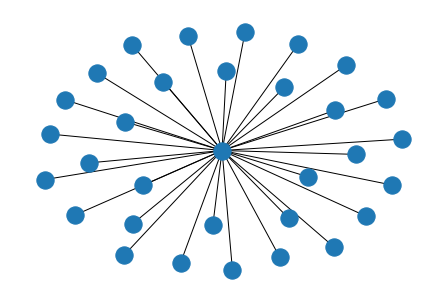

In [4]:
number_of_nodes = 32
star = create_star_network(number_of_nodes)
plot_graph(star)

## 2. Fully Connected Graph

In [5]:
def create_fully_connected_graph(n: int) -> nx.Graph:
    fully_connected_graph = nx.Graph()
    for i in range(n):
        for j in range(i+1, n):
            fully_connected_graph.add_edge(i, j)
    return fully_connected_graph


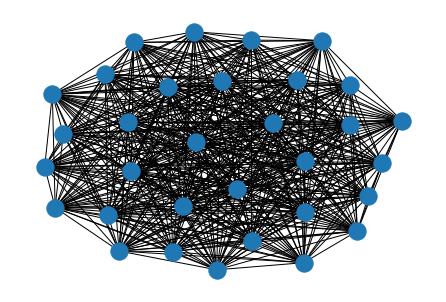

In [6]:
fcg = create_fully_connected_graph(number_of_nodes)
plot_graph(fcg)


## 3. One-dimensional lattice with periodic boundary conditions where each node 𝑖 has degree $𝑘_𝑖$ = 2

In [7]:
def create_one_dimensional_lattice(n: int, k: int, graph: nx.Graph = None) -> nx.Graph():
    if not graph:
        graph = nx.Graph()
        # If the nodes aren't created upfront the plot will look weird
        for i in range(n):
            graph.add_node(i)

    #recursion ends
    if k == 0:
        return graph

    #create edge color based on k
    #if k > 2 the color will be computed with some function using the golden ratio
    if k == 2:
        color="r"
    elif k == 1:
        color="g"
    else:
        color = get_color(k)

    # add edges
    for i in range(n):
        right = i+k
        left = i-k
        if right >= n:
            right -= n

        if left < 0:
            left += n

        graph.add_edge(i,left,color=color)
        graph.add_edge(i,right,color=color)

    return create_one_dimensional_lattice(n,k-1,graph)

def get_color(k):
    k = k**2 % 24
    phi = (1 + 5**0.5)/2
    n = k * phi - int(k * phi)
    return n, n**0.7, n**1.3


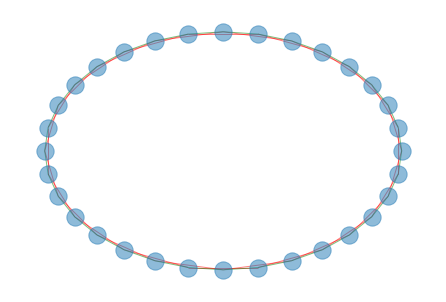

In [8]:
lattice = create_one_dimensional_lattice(n=32, k=2)
colors = [lattice[u][v]['color'] for u,v in lattice.edges]
nx.draw_circular(lattice, alpha=0.5,edge_color=colors)


# A01.2a
1. Compute the average degree ⟨𝑘⟩ and the density 𝛿 of the
networks.
2. Write a function max_degree that takes a network as its
argument, and returns two values: the id/name/label of
the node with the largest degree, and the value of its
degree. Test it on the datasets given

### utility functions

In [9]:
def solve_01_2a(graph: nx.Graph):
    print(graph)
    average_degree = calculate_average_degree(graph)
    network_density = calculate_network_density(graph)
    max_degree_index,max_degree = get_max_degree(graph)
    print(f"The average degree is {average_degree} and its network density is {network_density}")
    print(f"The node with highest degree has key {max_degree_index} and degree {max_degree}")

def calculate_average_degree(graph: nx.Graph) -> float:
    # number of edges is doubled since the graph is undirected and the graph won't store edge (x, y) and edge (y, x)
    # return sum(dict(graph.degree).values())/len(graph.degree)
    return graph.number_of_edges() * 2 / graph.number_of_nodes()

def calculate_network_density(graph: nx.Graph) -> float:
    return graph.number_of_edges() * 2 / (graph.number_of_nodes()*(graph.number_of_nodes()-1))

def get_max_degree(graph: nx.Graph) -> Tuple[int,int]:
    '''
    degree_dict = dict(graph.degree)
    node_max_degree = max(degree_dict, key=degree_dict.get)
    return node_max_degree, degree_dict[node_max_degree] 
    '''
    index = -1
    max_degree = 0
    for key in graph.nodes.keys():     
        current_degree = len(graph.adj[key])
        if current_degree > max_degree:
            index = key
            max_degree = current_degree
    return (index,max_degree)
    

## Karate network

In [10]:
karate = graph_reader.read_gml("graph_karate.gml")
solve_01_2a(karate)

Graph named "Zachary's Karate Club" with 34 nodes and 78 edges
The average degree is 4.588235294117647 and its network density is 0.13903743315508021
The node with highest degree has key 33 and degree 17


## Netsci

In [11]:
netsci = graph_reader.read_gml("graph_netsci.gml")
solve_01_2a(netsci)

Graph with 1461 nodes and 2742 edges
The average degree is 3.753593429158111 and its network density is 0.0025709544035329526
The node with highest degree has key 33 and degree 34


## Facebook

In [12]:
facebook = graph_reader.read_gml("graph_facebook.gml")
solve_01_2a(facebook)

Graph with 4039 nodes and 88234 edges
The average degree is 43.69101262688784 and its network density is 0.010819963503439287
The node with highest degree has key 107 and degree 1045


# A01.2b Degree Distributions
1. Select axis scales (lin-lin / lin-log / log-log) that allow you to
visualise better the distributions
2. Remember to bin the data accordingly to the scales selected

### utility functions

In [16]:
def calculate_degree_distribution(graph: nx.Graph) -> List[Tuple[int,float]]:
    n = graph.number_of_nodes()
    distribution = {}
    for key in graph.nodes.keys():
        # degree = graph.degree[key]
        degree = len(graph.adj[key])
        if degree not in distribution.keys():
            distribution[degree] = 1
        else:
            distribution[degree] += 1

    #for key in distribution:
    #    distribution[key] /= n
    distribution = sorted(distribution.items())
    return [d[0] for d in distribution], [d[1] for d in distribution]

def plot_distribution(graph: nx.Graph,bins=None,x_log=False, y_log=False,title=""):
    degrees = [graph.degree(i) for i in graph.nodes()]
    cnt = 0
    for i in degrees:
        if i <= 1:
            cnt+=1
    if bins is None:
        bins = [i for i in range(min(degrees), max(degrees)+1)]
    
    plt.hist(degrees,density=True, bins=bins, stacked=True)

    if x_log:
        plt.xscale("log")
        plt.xlabel("log degree")
    else:
        plt.xscale("linear")
        plt.xlabel("degree")
    
    if y_log:
        plt.yscale("log")
        plt.ylabel("log n_occurences")
    else:
        plt.yscale("linear")
        plt.ylabel("n_occurences")

    plt.title(title)
        
    
    
    plt.show()


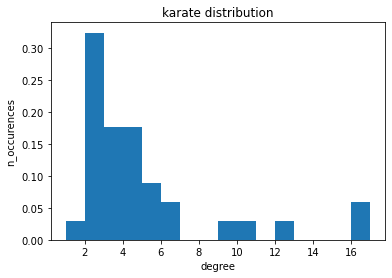

In [17]:
plot_distribution(karate,x_log=False,y_log=False, title="karate distribution")

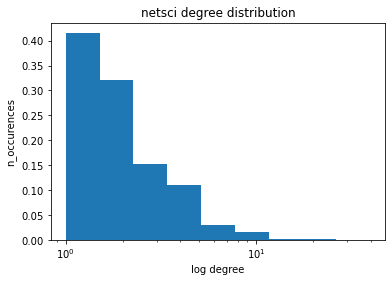

In [42]:
bins=np.logspace(0, 1.6,base=10, num=10)
#bins = np.linspace(0,35,36)
#bins = None
plot_distribution(netsci,bins=bins,y_log=False,x_log=True,title="netsci degree distribution")

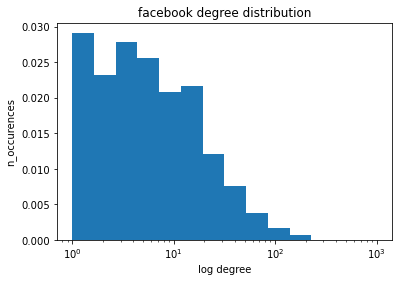

In [28]:
bins=np.logspace(0, 3,base=10, num=15)
plot_distribution(facebook,bins=bins,y_log=False,x_log=True, title="facebook degree distribution")